## 2.1 Remove Dups: Write code to remove duplicates from an unsorted linked list. Follow Up: No Buffer Allowed
In order to remove duplicates from a linked list, we need to be able to track duplicates. A simple hash table will work well here.
If we don't have a buffer, we can iterate with two pointers: current which iterates through the linked list, and runner which checks all subsequent nodes for duplicates.

In [19]:
class Node():
    def __init__(self, data, next=None):
        self.data, self.next = data, next
    def __str__(self):
        string = str(self.data)
        if self.next:
          string += ',' + str(self.next)
        return string
    
def removeDup(head):
    current = head
    if current:
        dict = {current.data:True}
        while current.next:
            if current.next.data in dict:
                current.next = current.next.next
            else:
                dict[current.next.data] = True
                current = current.next

def removeDup1(head):
    current = head
    while current:
        runner = current
        while runner.next:
            if runner.next.data == current.data:
                runner.next = runner.next.next
            else:
                runner = runner.next
        
        current = current.next
            
head = Node(1,Node(3,Node(3,Node(1,Node(5,None)))))
removeDup1(head)
print(str(head))


1,3,5


## 2.2 Return Kth to Last: Implement an algorithm to find the kth to last element of a singly linked list.
## 19. Remove Nth Node From End of List


What if you knew the linked list size? What is the difference between finding the Kth-to- last element and finding the Xth element? --> 2 pass algo

Try implementing it recursively. If you could find the (K - l )th to last element, can you
find the Kth element?

Can you do it iteratively? Imagine if you had two pointers pointing to adjacent nodes and they were moving at the same speed through the linked list. When one hits the end of the linked list, where will the other be?

In [20]:
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next:
          string += ',' + str(self.next)
        return string
def removeNthFromEnd(head,n):
    fast,slow = head, head
    for _ in range(n):
        fast = fast.next
    # check conner case of removing the head right after the fast cursor got its head start.
    if not fast:
        return head.next
    while fast.next:
        slow = slow.next
        fast = fast.next
    slow.next = slow.next.next
    return head
head1 = ListNode(7,ListNode(2,ListNode(9,ListNode(1,ListNode(6,ListNode(3,ListNode(8)))))))
head2 = removeNthFromEnd(head1, 3)
print(str(head2))

7,2,9,1,3,8


## 86. Partition List ( 2.4 Partition): Write code to partition a linked list around a value x, such that all nodes less than x come before all nodes greater than or equal to x. 

You should preserve the original relative order of the nodes in each of the two partitions.

> Consider that the elements don't have to stay in the same relative order. We only need to ensure that elements less than the pivot must be before elements greater than the pivot. Does that help you come up with more solutions?

If this were an array, we would need to be careful about how we shifted elements. Array shifts are very expensive.However, in a linked list, the situation is much easier. Rather than shifting and swapping elements, we can actually create two different linked lists: one for elements less than x, and one for elements greater than or equal to x.

In [8]:
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next:
          string += ',' + str(self.next)
        return string
    
def partition(head, x):
        less=h1 = ListNode(0)
        greater=h2=ListNode(0)
        while head:
            if head.val < x:
                less.next = head
                less = less.next
            else:
                greater.next = head
                greater = greater.next
            head = head.next
        greater.next = None
        less.next = h2.next
        return h1.next
head1 = ListNode(7,ListNode(2,ListNode(9,ListNode(1,ListNode(6,ListNode(3,ListNode(8)))))))
head2 = partition(head1, 6)
print(str(head2))

2,1,3,7,9,6,8


<div class="alert alert-block alert-success">
23. Merge k Sorted Lists
Merge k sorted linked lists and return it as one sorted list. Analyze and describe its complexity.
Example:
Input:
[
  1->4->5,
  1->3->4,
  2->6
]
Output: 1->1->2->3->4->4->5->6
</div>

**Approach 1**: Brute Force

* Traverse all the linked lists and collect the values of the nodes into an array.
* Sort and iterate over this array to get the proper value of nodes.
* Create a new sorted linked list and extend it with the new nodes.

**Approach 2**: Compare one by one. Time: O(kN), Space: O(N)

* Compare every k nodes (head of every linked list) and get the node with the smallest value.
* Extend the final sorted linked list with the selected nodes.

**Approach 3**: Optimize Approach 2 by Priority Queue. Time: O(Nlogk), O(N)
* optimize the comparison process by priority queue

**Approach 4**: Merge lists one by one

Convert merge $\text{k}$ lists problem to merge 2 lists $(\text{k-1})$ times. 

**Approach 5**: Merge with Divide And Conquer. Time:  O(NlogK), Space: O(1)
This approach walks alongside the one above but is improved a lot. We don't need to traverse most nodes many times repeatedly

Pair up $\text{k}$ lists and merge each pair.

After the first pairing, $\text{k}$ lists are merged into k/2 lists with average 2N/k length, then k/4, k/8 and so on.

Repeat this procedure until we get the final sorted linked list.

Thus, we'll traverse almost N nodes per pairing and merging, and repeat this procedure about $\log_{2}{k}$ times.
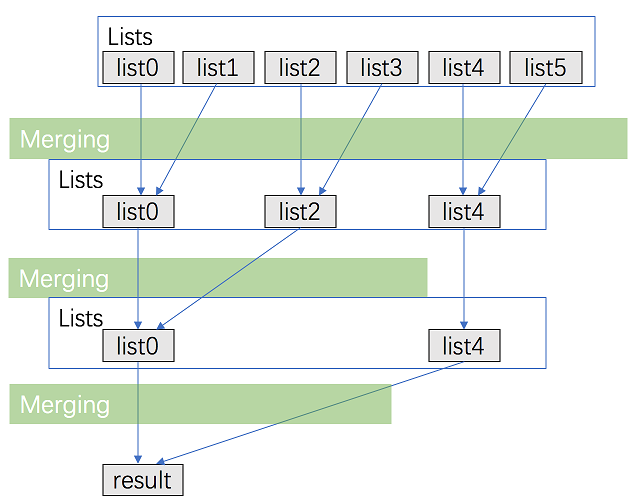

In [32]:
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next:
          string += ',' + str(self.next)
        return string

def mergeKLists1(list):
    ret = []
    for lst in lists:
        while lst:
            ret.append(lst.val)
            lst = lst.next
    return sorted(ret)

import heapq

def mergeKLists2(list):
    ret = tail = ListNode(-1)
    heap = [(l.val,index,l) for index,l in enumerate(lists) if l]
    heapq.heapify(heap)

    while heap:
        smallest_val,index,smallest = heapq.heappop(heap)
        if smallest.next:
            heapq.heappush(heap,(smallest.next.val,index,smallest.next))
        tail.next = smallest
        tail = smallest
    return ret.next

def merge2list(l1,l2):
        cur = dummy = ListNode(-1)
        while l1 and l2:
            if l1.val <= l2.val:
                cur.next = l1
                l1 = l1.next
            else:
                cur.next = l2
                l2 = l2.next
            
            cur = cur.next
        cur.next = l1 or l2
        return dummy.next
    
def mergeKLists5(lists):
        n = len(lists)
        interval = 1
        while interval < n:
            for i in range(0,n-interval,interval*2):
                lists[i] = merge2list(lists[i],lists[i+interval])
            interval *= 2
        return lists[0] if n > 0 else lists


l1 = ListNode(1,ListNode(4,ListNode(5)))
l2 = ListNode(1,ListNode(3,ListNode(4)))
l3 = ListNode(2,ListNode(6))
lists = [l1,l2,l3]
sortedList = mergeKLists5(lists)
print(str(sortedList))


1,1,2,3,4,4,5,6


<div class="alert alert-block alert-success">
92. Reverse Linked List II
Reverse a linked list from position m to n. Do it in one-pass.

Note: 1 ≤ m ≤ n ≤ length of list.

Example:

Input: 1->2->3->4->5->NULL, m = 2, n = 4
Output: 1->4->3->2->5->NULL
</div>

In [34]:
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next: string += ',' + str(self.next)
        return string

def reverseBetween(head, m, n):
    dummy = prev_m = ListNode(0)
    dummy.next = head
    # move m-1 node
    for _ in range(m-1):
        prev_m = prev_m.next
    
    # reverse nodes from m to n
    cur = prev_m.next
    prev = None
    for _ in range(n-m+1):
        nxt = cur.next
        cur.next = prev
        prev = cur
        cur = nxt
    
    # connect three parts      
    prev_m.next.next = cur  # Tricky
    prev_m.next = prev

    return dummy.next

l1 = ListNode(1,ListNode(2,ListNode(3,ListNode(4,ListNode(5)))))
print(str(reverseBetween(l1,2,4)))

1 2 3
1,4,3,2,5


## 114. Flatten Binary Tree to Linked List
<div class="alert alert-block alert-success">
Given a binary tree, flatten it to a linked list in-place.

For example, given the following tree:

    1
   / \
  2   5
 / \   \
3   4   6
The flattened tree should look like:

1
 \
  2
   \
    3
     \
      4
       \
        5
         \
          6
</div>

In [27]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.data,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.data)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def flatten1(self,root):
    def helper(root):
        if not root:
            return None
        helper(root.left)
        helper(root.right)

        root.right = self.prev
        root.left = None
        self.prev = root
    self.prev = TreeNode(0)
    helper(root)
    
def flatten_dfs_iter(root):
    last = TreeNode(-1)
    stack = [root]
    while stack:
        node = stack.pop()
        last.right = node
        last.left =None
        
        if node and node.right:
            stack.append(node.right)
        if node and node.left:
            stack.append(node.left)
        last = node
        
tree1 = TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)),TreeNode(5,None,TreeNode(6)))
print(str(tree1))
#flatten_dfs_iter(tree1)
self.flatten1(tree1)
print(str(tree1))

(1(2(3..)(4..))(5.(6..)))


NameError: name 'self' is not defined